In [2]:
import scipy
import numpy as np
import scipy
import os

In [5]:
import pandas as pd
min_list = np.zeros(5)
max_list = np.zeros(5)
for i in range(1, 12):
    signal = scipy.io.loadmat(f"./Data/train/train_{i}.mat")["A"]
    min = signal.min(axis=1).astype(float)
    print(min)
    max = signal.max(axis=1).astype(float)
    print(max)
    print("============================")
    
    # for j in range(5):
    #     if min[j] < min_list[j]:
    #         min_list[j] = min[j] 
    #     if max[j] > max_list[j]:
    #         max_list[j] = max[j] 


[-0.27637311 -0.28235629 -0.37475706 -0.26677283 -0.29884503]
[0.30045486 0.26592224 0.37109877 0.26352955 0.27371008]
[-0.28025766 -0.27727856 -0.40266093 -0.29037997 -0.25007368]
[0.26079473 0.26475874 0.39352678 0.30501685 0.26863664]
[-0.25078229 -0.26524979 -0.37486476 -0.25072801 -0.27514625]
[0.28110352 0.25935136 0.38590283 0.25410773 0.26193161]
[-0.26243589 -0.25752522 -0.4025889  -0.2797633  -0.28435028]
[0.26543519 0.27815702 0.4332819  0.27023057 0.27804352]
[-0.30010904 -0.25187529 -0.37654129 -0.27226551 -0.28582038]
[0.2911036  0.25044174 0.36519759 0.29780464 0.25478912]
[-0.2853214  -0.2812574  -0.41047179 -0.26578026 -0.26982387]
[0.25418505 0.2737271  0.3995997  0.27412153 0.25486577]
[-0.3153203  -0.26303194 -0.40452122 -0.26974116 -0.2834059 ]
[0.2795171  0.25542643 0.39249566 0.27466215 0.26594878]
[-0.26912521 -0.26951252 -0.3882245  -0.29943262 -0.28723026]
[0.29949195 0.24880992 0.37720235 0.29527798 0.2708245 ]
[-0.30364496 -0.25776715 -0.40835015 -0.25854384

In [3]:
max_list

array([0.30931597, 0.3075239 , 0.44079225, 0.30501685, 0.30842456])

In [4]:
min_list

array([-0.3153203 , -0.28235629, -0.41047179, -0.29943262, -0.30017081])

In [5]:
df = pd.DataFrame({"min":min_list, "max":max_list})
df

,min,max
0,-0.315320,0.309316
1,-0.282356,0.307524
2,-0.410472,0.440792
3,-0.299433,0.305017
4,-0.300171,0.308425


In [6]:
df.to_csv("./Data/min_max.csv", index=False)

In [7]:
signal.max(axis=1)

array([0.29334156, 0.3075239 , 0.44079225, 0.26224497, 0.27086562])

In [8]:
def sliding_window(signal, window, stride):
    length = signal.shape[-1]
    i = 0
    x = []
    while i < length-window:
        x.append(signal[:, i:i+window])
        i += stride
    return x

In [91]:
def min_max_scaler(signal, min_max):
    new_signal = np.copy(signal)
    for i in range(signal.shape[0]):
        new_signal[i, :] = (signal[i, :] - min_max[i][0])/(min_max[i][1] - min_max[i][0])
    return new_signal

min_max = pd.read_csv(os.path.join("./Data", "min_max.csv")).values

In [92]:
a = scipy.io.loadmat("./Data/train/train_1.mat")["A"]
b = scipy.io.loadmat("./Data/train/train_5.mat")["A"]

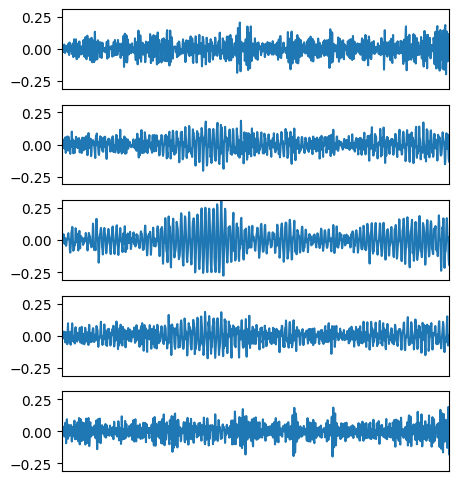

In [100]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(5, 1, sharex="col", figsize=(5,6))
for i in range(5):
    ax[i].plot(range(len(a[i, :1024])), a[i, :1024])
    ax[i].set_ylim([-0.31, 0.31])
    ax[i].set_xlim([0, 1024])
    ax[i].set_xticks([])
plt.savefig("./pic/Raw_signal.svg",bbox_inches='tight')

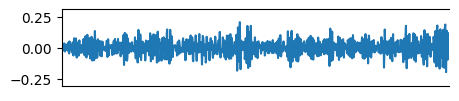

In [101]:
fig, ax = plt.subplots(1, 1, sharex="col", figsize=(5,1))
ax.plot(range(len(a[0, :1024])), a[0, :1024])
ax.set_ylim([-0.31, 0.31])
ax.set_xlim([0, 1024])
ax.set_xticks([])
ax.spines[['right']].set_visible(False)
plt.savefig("./pic/Raw_signal.svg",bbox_inches='tight')

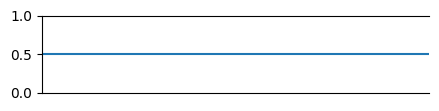

In [105]:
fig, ax = plt.subplots(1, 1, sharex="col", figsize=(5,1))
ax.plot(range(len(norm_a[i, :1024])), np.array([0.5 for i in range(1024)]))
ax.set_ylim([0, 1.00])
ax.set_xlim([0, 1024])
ax.set_xticks([])
ax.spines[['right']].set_visible(False)
plt.savefig(f"./pic/zeros.svg",bbox_inches='tight')

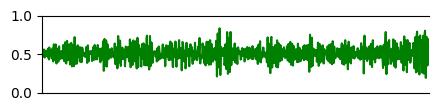

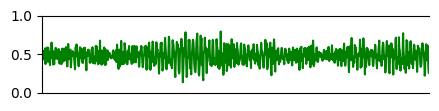

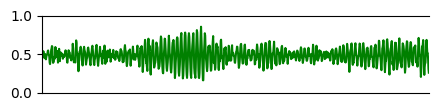

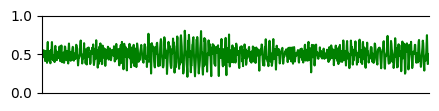

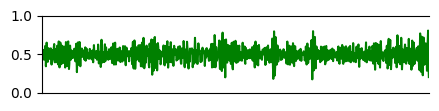

In [106]:
norm_a = min_max_scaler(a, min_max)

for i in range(5):
    fig, ax = plt.subplots(1, 1, sharex="col", figsize=(5,1))
    ax.plot(range(len(norm_a[i, :1024])), norm_a[i, :1024], color="green")
    ax.set_ylim([0, 1.00])
    ax.set_xlim([0, 1024])
    ax.set_xticks([])
    ax.spines[['right']].set_visible(False)
    plt.savefig(f"./pic/norm_signal_{i}.svg",bbox_inches='tight')

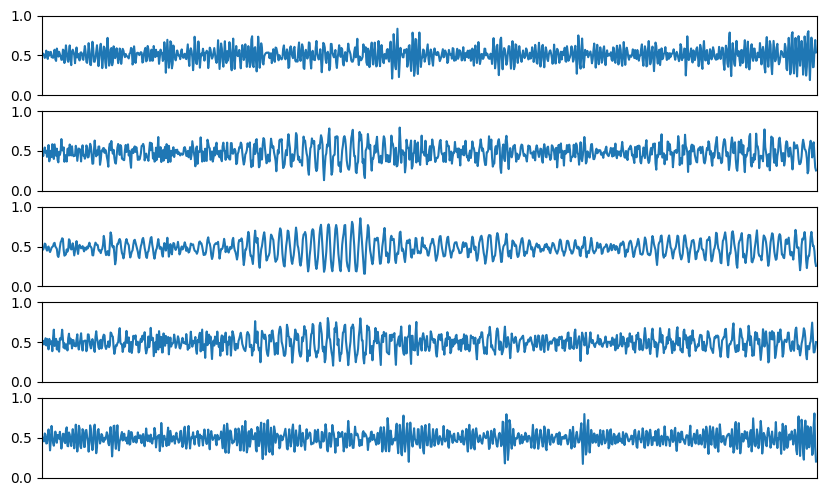

In [72]:
norm_a = min_max_scaler(a, min_max)

fig, ax = plt.subplots(5, 1, sharex="col", figsize=(10,6))
for i in range(5):
    ax[i].plot(range(len(norm_a[i, :1024])), norm_a[i, :1024])
    ax[i].set_ylim([0, 1])
    ax[i].set_xlim([0, 1024])
    ax[i].set_xticks([])
plt.savefig("./pic/norm_signal.svg",bbox_inches='tight')

In [49]:
result = sliding_window(a, 1024, 1024)

In [50]:
len(result)

195

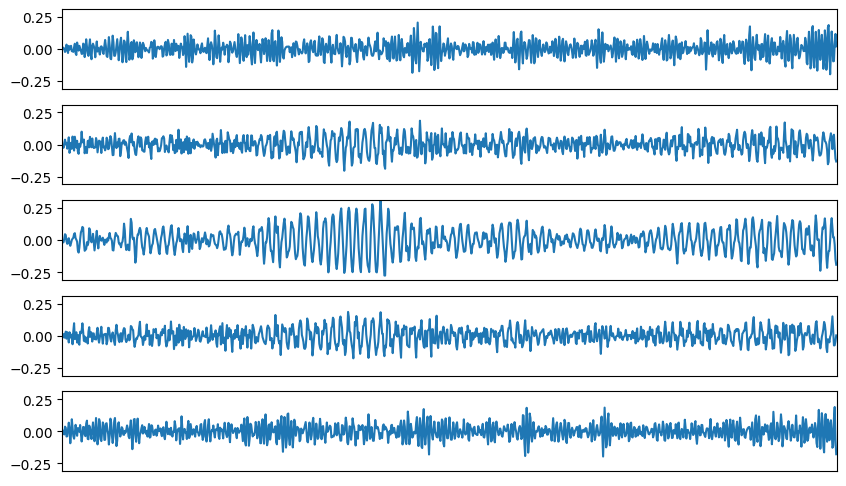

In [51]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(5, 1, sharex="col", figsize=(10,6))
for i in range(5):
    ax[i].plot(range(len(result[0][i, :])), result[0][i, :])
    ax[i].set_ylim([-0.31, 0.31])
    ax[i].set_xlim([0, 1024])
    ax[i].set_xticks([])
plt.savefig("./pic/sliding_window.svg",bbox_inches='tight')

In [10]:
result = sliding_window(a, 1024, 1024)

In [12]:
for i in result:
    if i.shape != (5, 1024):
        print(i.shape)

In [13]:
a.shape

(5, 200000)

In [13]:
a.shape

(5, 200000)

In [37]:
b.shape

(5, 200000)

NameError: name 'num' is not defined

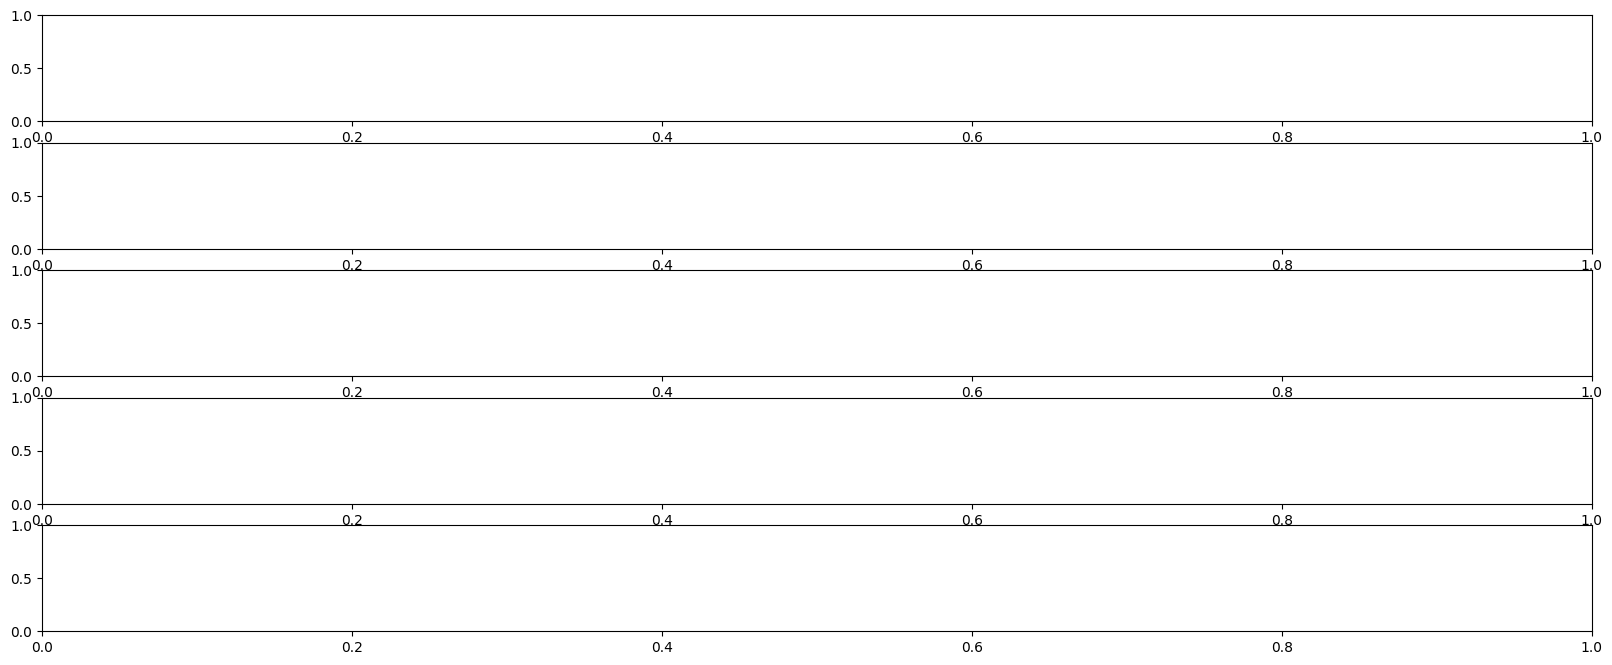

In [21]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(5, 1, figsize=(20,8))
for i in range(5):
    ax[i].plot(range(len(a[i, :num])), a[i, :num], label=f"Accelerator {i+1} (A)")
    ax[i].plot(range(len(b[i, :num])), b[i, :num], "r--", label=f"Accelerator {i+1} (B)", alpha=0.5)
    ax[i].legend(loc = 'upper right')

In [40]:
a = scipy.io.loadmat("./Data/train/train_1.mat")["A"]
b = scipy.io.loadmat("./Data/test/test_1.mat")["B"]

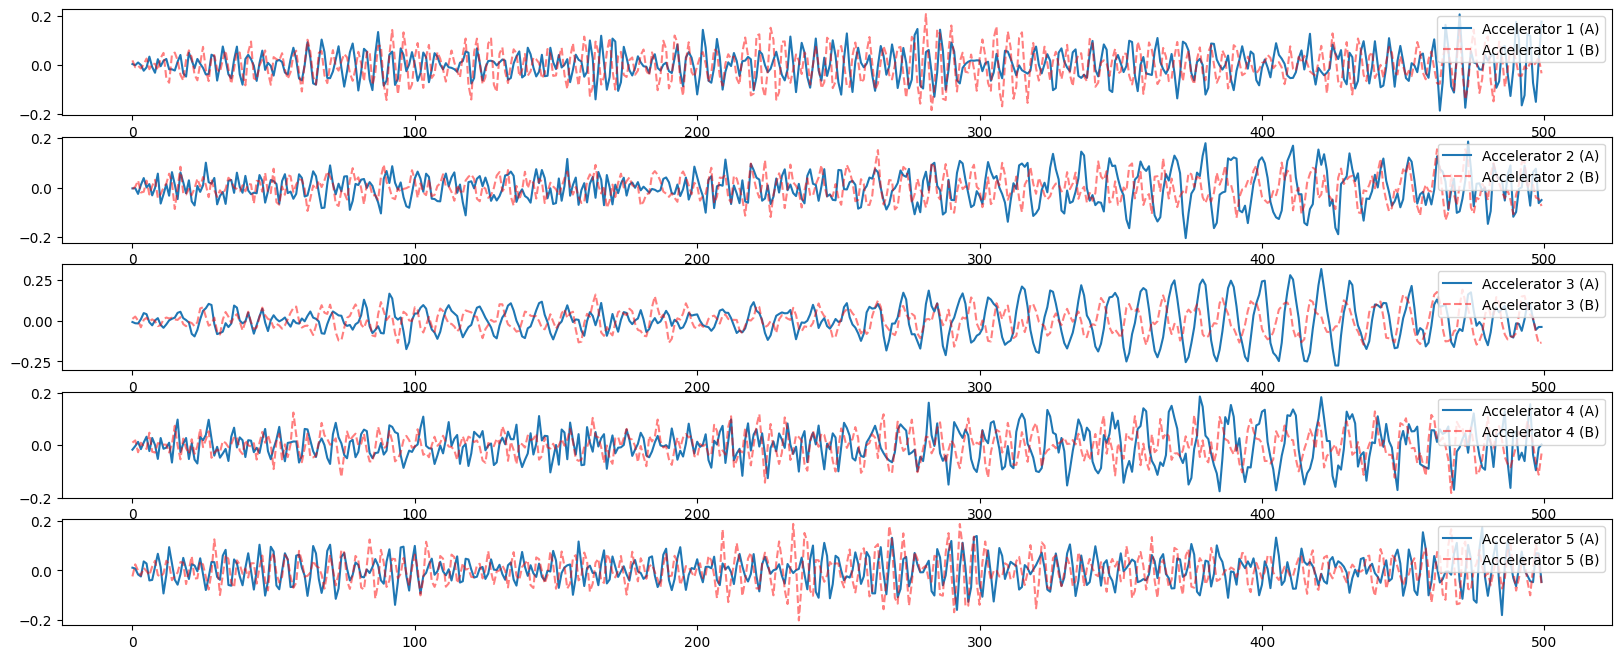

In [41]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(5, 1, figsize=(20,8))
for i in range(5):
    ax[i].plot(range(len(a[i, :num])), a[i, :num], label=f"Accelerator {i+1} (A)")
    ax[i].plot(range(len(b[i, :num])), b[i, :num], "r--", label=f"Accelerator {i+1} (B)", alpha=0.5)
    ax[i].legend(loc = 'upper right')

In [16]:
from scipy.fft import fft, fftfreq

In [17]:
result[0].shape

(5, 100)

In [29]:
N = 512
T = 1.0 / 100
xf = fftfreq(N, T)[:N//2]

In [30]:
xf.shape

(256,)

In [31]:
np.abs(yt[:N//2]).max()

1.9073603337030736

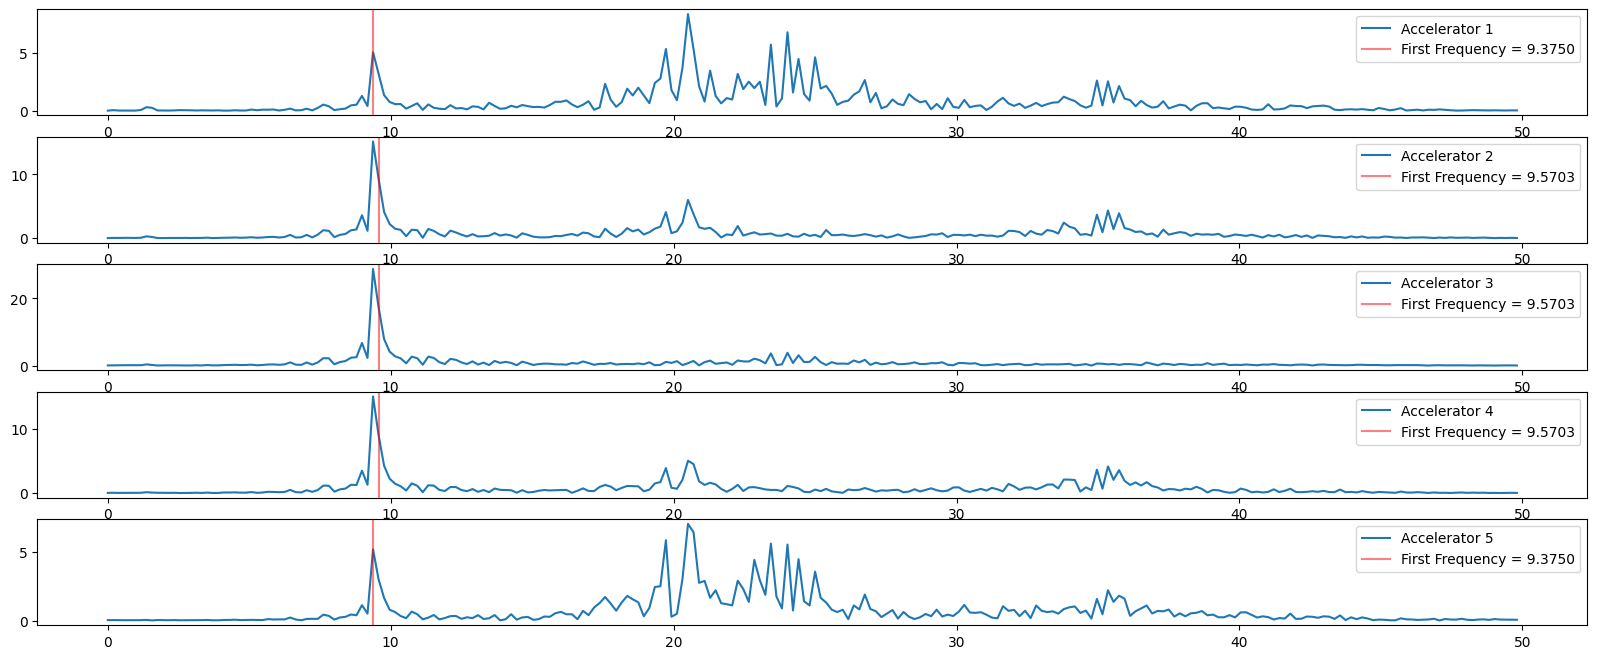

In [33]:
fig, ax = plt.subplots(5, 1, figsize=(20,8))
for i in range(5):
    yt = scipy.fft.fft(result[1][i, :N])
    first_mode = np.argmax(yt[:N//10])
    ax[i].plot(xf, np.abs(yt[:N//2]), label=f"Accelerator {i+1}")
    ax[i].axvline(x = xf[first_mode], color = 'r', alpha=0.5, label=f"First Frequency = {xf[first_mode]:.4f}")
    ax[i].legend(loc = 'upper right')

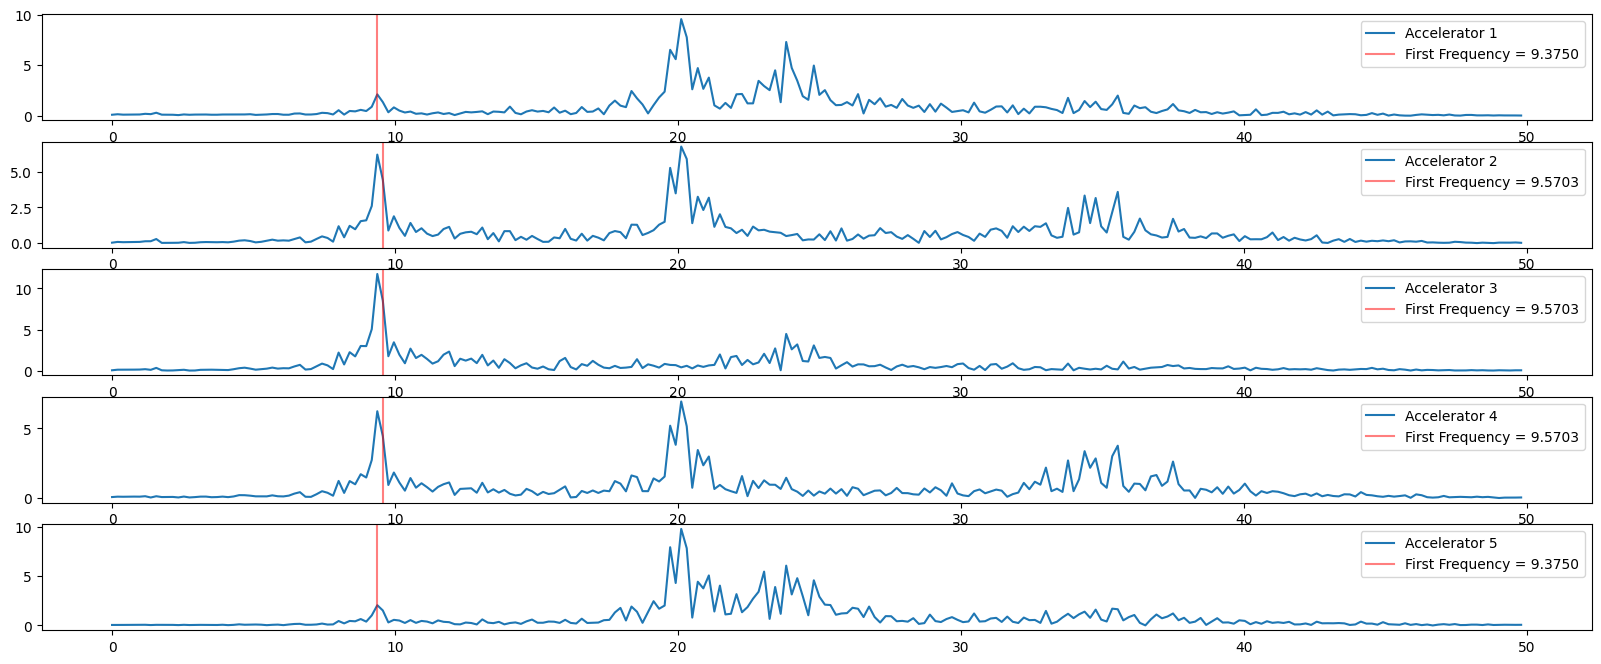

In [35]:
fig, ax = plt.subplots(5, 1, figsize=(20,8))
for i in range(5):
    yt = scipy.fft.fft(result[-1][i, :N])
    first_mode = np.argmax(yt[:N//10])
    ax[i].plot(xf, np.abs(yt[:N//2]), label=f"Accelerator {i+1}")
    ax[i].axvline(x = xf[first_mode], color = 'r', alpha=0.5, label=f"First Frequency = {xf[first_mode]:.4f}")
    ax[i].legend(loc = 'upper right')